### Confidence Interval
A confidence interval is a statistical concept and a range of values that is used to estimate the true or population parameter of interest. It provides a plausible range within which we can reasonably expect the true parameter to lie, based on a sample of data. Confidence intervals are commonly used in inferential statistics to quantify the uncertainty associated with sample estimates.

The formula for a confidence interval (CI) for the population mean $(\mu)$ when the population standard deviation $(\sigma)$ is known. It is expressed as:  
$[ \text{CI} = \bar{x} \pm Z_{\frac{\alpha}{2}} \times \frac{\sigma}{\sqrt{n}} ]$


Here:

- $(\bar{x})$ is the sample mean.
- $(Z_{\frac{\alpha}{2}})$ is the critical value from the standard normal distribution corresponding to the chosen confidence level $(1 - \alpha)$. It determines the margin of error.
- $(\sigma)$ is the population standard deviation.
- $(n)$ is the sample size.

This formula calculates the range above and below the sample mean within which the true population mean is likely to fall with a certain level of confidence.

The term $(Z_{\frac{\alpha}{2}} \times \frac{\sigma}{\sqrt{n}})$ is the margin of error, and adding or subtracting it from the sample mean gives the lower and upper bounds of the confidence interval, respectively.

## What is a Margin of Error?

A **margin of error** tells you **how many percentage points your results will differ** from the real population value. For example, a 95% [confidence interval](https://www.statisticshowto.com/probability-and-statistics/confidence-interval/) with a 4 percent margin of error means that your [statistic](https://www.statisticshowto.com/statistic/) will be within 4 percentage points of the real population value 95% of the time.

The margin of error (MOE) in the context of a confidence interval is calculated using the standard error of the sample mean. For a population with standard deviation **$(\sigma)$** and a sample of size $(n)$, the margin of error for a confidence interval $(CI)$ at a confidence level of $(1-\alpha)$ is given by:

$[ MOE = Z \times \frac{\sigma}{\sqrt{n}}$ ]

Here:

- $( Z)$ is the critical value from the standard normal distribution corresponding to the chosen confidence level. For example, for a 95% confidence interval, $(Z)$ would be approximately 1.96.
- $(\sigma)$ is the population standard deviation (if known).
- $(n)$ is the sample size.

If the population standard deviation $(\sigma)$ is unknown and you are using the sample standard deviation $(s)$ as an estimate, the formula becomes:

$[ MOE = t \times \frac{s}{\sqrt{n}} ]$

Here:

- $(t)$ is the critical value from the t-distribution based on the degrees of freedom and chosen confidence level.
- $(s)$ is the sample standard deviation.

The margin of error represents the range above and below the sample estimate within which the true population parameter is likely to fall with a certain level of confidence. It is an important component when constructing confidence intervals.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

#### Known Population Parameter

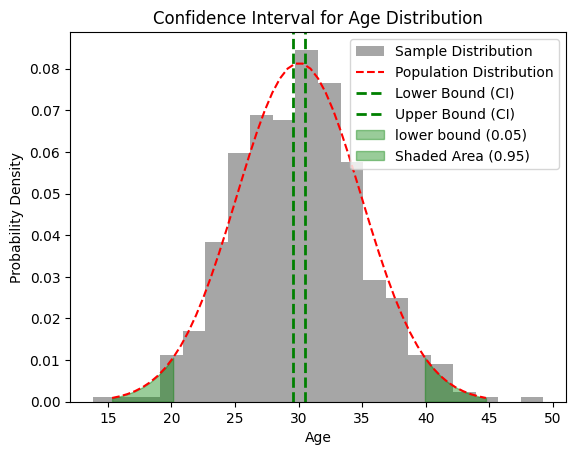

Sample Mean: 30.03
Margin of Error: 0.44
critical value: 1.96
Confidence Interval: (29.60, 30.47)


In [17]:
np.random.seed(42)

population_mean = 30
population_std = 5
sample_size = 500
# Generate a random sample of ages from the population distribution
sample = np.random.normal(population_mean, population_std, sample_size)

sample_mean = np.mean(sample)
sample_std  = np.std(sample)

standard_error = population_std / np.sqrt(sample_size)

# Set the confidence level and find the critical value from the standard normal distribution
confidence_level = 0.95
alpha = 1 - confidence_level
z_critical = stats.norm.ppf(1 - alpha / 2)

margin_of_error = z_critical * standard_error
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

# Plot the sample distribution
plt.hist(sample, bins=20, density=True, alpha=0.7, color='gray', label='Sample Distribution')

x_values   = np.linspace(sample_mean - 3 * sample_std, sample_mean + 3 * sample_std)
pdf_values = stats.norm.pdf(x_values, loc=sample_mean, scale=sample_std)

cdf_values = stats.norm.cdf(x_values, loc=sample_mean, scale=sample_std)
# Find the cumulative probabilities corresponding to the z-scores
cdf_lower_bound = cdf_values <= alpha / 2
cdf_upper_bound = cdf_values >= 1 - alpha / 2

plt.plot(x_values, pdf_values, 'r--', label='Population Distribution')


# Plot the confidence interval
plt.axvline(confidence_interval[0], color='green', linestyle='dashed', linewidth=2, label='Lower Bound (CI)')
plt.axvline(confidence_interval[1], color='green', linestyle='dashed', linewidth=2, label='Upper Bound (CI)')
plt.fill_between(x_values, pdf_values, where=cdf_lower_bound, color='green', alpha=0.4, label="lower bound (0.05)")
plt.fill_between(x_values, pdf_values, where=cdf_upper_bound, color='green', alpha=0.4, label="Shaded Area (0.95)")



# Set labels and legend
plt.title('Confidence Interval for Age Distribution')
plt.xlabel('Age')
plt.ylabel('Probability Density')
plt.legend()

plt.show()

print(f"Sample Mean: {sample_mean:.2f}")
print(f"Margin of Error: {margin_of_error:.2f}")
print(f"critical value: {z_critical:.2f}")
print(f"Confidence Interval: ({confidence_interval[0]:.2f}, {confidence_interval[1]:.2f})")

#### Unknown Population Parameter

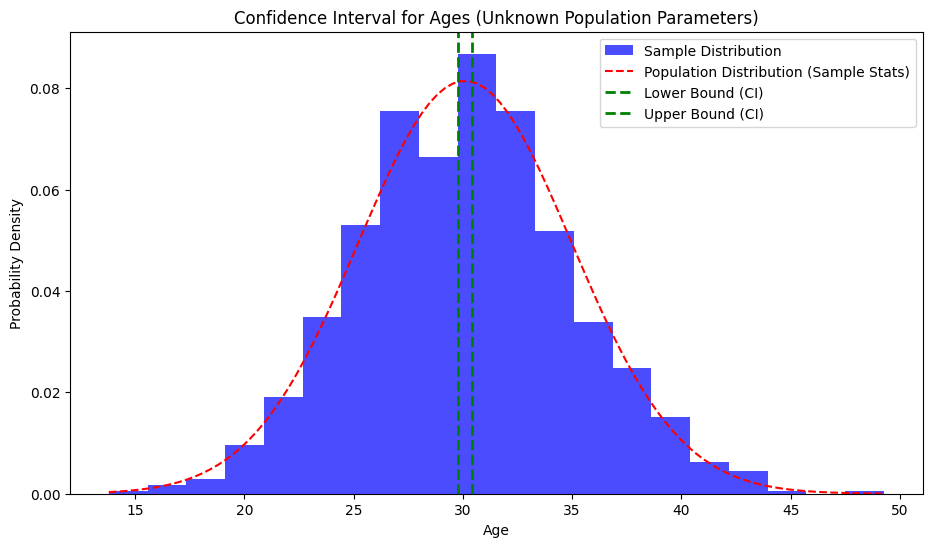

Sample Mean: 30.10
Sample Standard Deviation: 4.90
Margin of Error: 0.30
Confidence Interval: (29.79, 30.40)
Confidence Interval: (29.79, 30.40) (using stats.t.interval)


In [110]:
np.random.seed(42)
sample_size = 1000
rv_mean = 30
rv_std = 5
sample_ages = np.random.normal(loc=rv_mean, scale=rv_std, size=sample_size)

# Calculate sample statistics
sample_mean = np.mean(sample_ages)
sample_std  = np.std(sample_ages, ddof=1)  # Use ddof=1 for sample standard deviation

# Set the confidence level and find the critical value from the t-distribution
confidence_level = 0.95
alpha = 1 - confidence_level
degrees_of_freedom = sample_size - 1
critical_value = stats.t.ppf(1 - alpha / 2, degrees_of_freedom)

standard_error = sample_std / np.sqrt(sample_size)
margin_of_error = critical_value * standard_error
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)
ci = stats.t.interval(confidence=confidence_level, df=degrees_of_freedom, loc=sample_mean, scale=standard_error)

plt.figure(figsize=(11, 6))
# Plot the sample distribution
plt.hist(sample_ages, bins=20, density=True, alpha=0.7, color='blue', label='Sample Distribution')

# Plot the population distribution using the sample mean and sample std with t-distribution
sample_x_values = np.linspace(min(sample_ages), max(sample_ages), 100)
sample_y_values = stats.t.pdf(sample_x_values, df=sample_size - 1, loc=np.mean(sample_ages), scale=np.std(sample_ages, ddof=1))
plt.plot(sample_x_values, sample_y_values, 'r--', label='Population Distribution (Sample Stats)')


# Plot the confidence interval
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2, label='Lower Bound (CI)')
plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='Upper Bound (CI)')

# Set labels and legend
plt.title('Confidence Interval for Ages (Unknown Population Parameters)')
plt.xlabel('Age')
plt.ylabel('Probability Density')
plt.legend(loc='upper right')

# Show the plot
plt.show()

# Display the results
print(f"Sample Mean: {sample_mean:.2f}")
print(f"Sample Standard Deviation: {sample_std:.2f}")
print(f"Margin of Error: {margin_of_error:.2f}")
print(f"Confidence Interval: ({confidence_interval[0]:.2f}, {confidence_interval[1]:.2f})")
print(f"Confidence Interval: ({confidence_interval[0]:.2f}, {confidence_interval[1]:.2f}) (using stats.t.interval)")

The goal of this example is to illustrate the variability in the confidence intervals when you take 10 independent samples from a population with a known mean and standard deviation. Each sample is generated randomly, and the confidence interval is calculated for each sample using the t-distribution. By plotting these confidence intervals, you can visualize how they vary across different samples, providing insight into the precision and uncertainty associated with estimating the population mean from a sample.

In summary, it's a way to demonstrate how confidence intervals can change from one sample to another, highlighting the inherent variability in statistical estimation when dealing with finite samples.

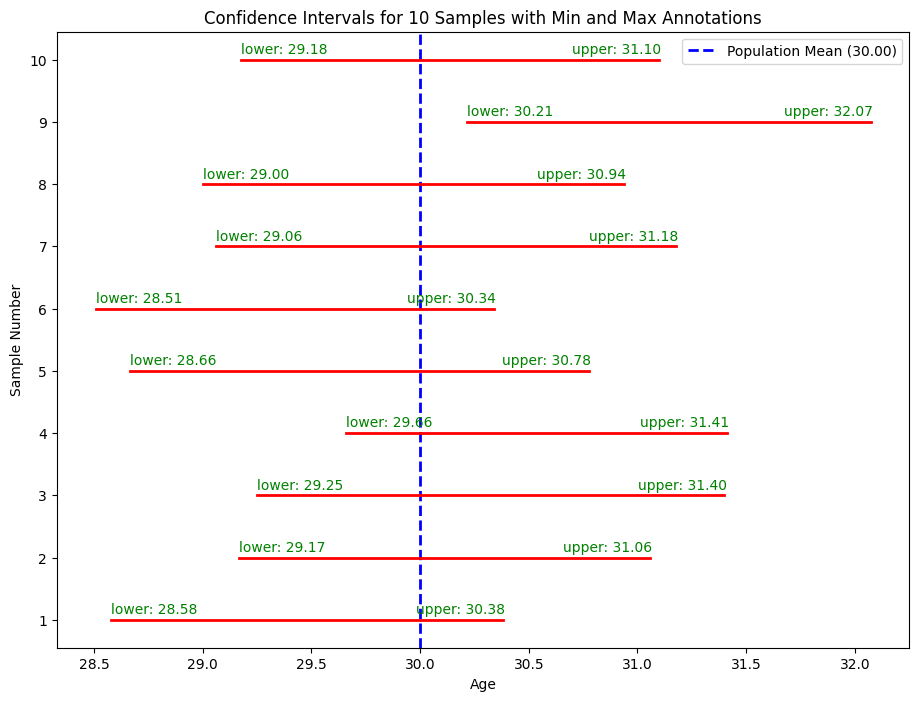

In [105]:
np.random.seed(42)

pop_mean = 30
pop_std = 5
sample_size = 100
num_samples = 10

intervals = []

for _ in range(num_samples):
    sample_ages = np.random.normal(loc=pop_mean, scale=pop_std, size=sample_size)

    sample_mean = np.mean(sample_ages)
    sample_std = np.std(sample_ages, ddof=1)
    standard_error = sample_std / np.sqrt(sample_size)

    confidence_interval = stats.t.interval(0.95, df=sample_size-1, loc=sample_mean, scale=standard_error)

    intervals.append(confidence_interval)

plt.figure(figsize=(11, 8))

plt.axvline(pop_mean, color='blue', linestyle='dashed', linewidth=2, label=f'Population Mean ({pop_mean:.2f})')

for idx, interval in enumerate(intervals):
    plt.plot(interval, [idx + 1, idx + 1], color='red', linewidth=2)
    plt.text(interval[0], idx + 1.1, f'lower: {interval[0]:.2f}', color='green')
    plt.text(interval[1] - 0.4, idx + 1.1, f'upper: {interval[1]:.2f}', color='green')


plt.yticks(ticks=range(1, num_samples + 1))
plt.xlabel('Age')
plt.ylabel('Sample Number')
plt.title('Confidence Intervals for 10 Samples with Min and Max Annotations')
plt.legend()
plt.show()